In [2]:
pip install pyperclip

Note: you may need to restart the kernel to use updated packages.


# Credit Card Marketing Project

<div class="alert alert-block alert-info">


Table Content:

* [Introduction](#Introduction)
* [Preparation](#Preparation)
* [Exploring Data + Basic cleaning + Data featuring](#Exploring-Data-+-Basic-cleaning-+-Data-featuring)
* [Modeling: Model M1](#Modeling:-Model-M1)
* [Modeling: Model M2](#Modeling:-Model-M2)
* [Modeling: Model M3](#Modeling:-Model-M3)
* [Modeling: Model M3_1](#Modeling:-Model-M3_1)
* [Modeling: Model M4](#Modeling:-Model-M4)
* [Modeling: Model M5](#Modeling:-Model-M5)
* [Modeling: Other models](#Modeling:-Other-models)


</div>


### Introduction
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]


In this notebook, I am including all steps for my mid-term project in IronHack. I have chosen to work on a Classification Model. It's to predict if a customer will take an offer from a bank based on several factors, which include income, houseowns, balance, credit status, type of mailer, etc. 

This project is to split in 5 parts:
* Preparation 
* EDA (Overview + In depth)
* Cleaning (General + Numerical + Categorical)
* Data Featuring (Numerical + Categorical)
* Modeling
*M1: the base model without any cleaning, featuring
*M2: clean the outliars based on Average Income feature
*M3: Deal with inbalanced data
*M3_1: SMOTE, oversampling + scaling numberical 
*M4: choosing features only base on coefficient score
*M5: choosing features base on my understanding
* Modeling Validation

In this project, I will first run a model without any cleaning or featuring to see the result as a benchmark for the model. In this case, it's more visible to see the impacts of the cleaning and featuring process. At last, I will try to explore different types of models as well. In each step, you can see an explanation of my process. 

Please feel free to navigate yourself through the content table. 
Here is my Project Management Dashboard - Trello link: https://trello.com/invite/b/3beff2jF/218f9433022afac20523f3c83aef5801/credit-card-marketing-project


### Preparation - import data
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]


In [3]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk


In [801]:
#importing dataset and taking a look
data = pd.read_excel('creditcardmarketing.xlsx')
data

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


# Exploring Data + Basic cleaning + Data featuring
In this part, we are exploring the dataset. Here are the questions we should answer:
- What information does the dataset have?
- What are the data types? 
- Which column contains the target variable? 

[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]


In [802]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

### Here are the summary of the features: 
   ##### Discrete Numerical Data: 
        - Bank Account Open
        - Credit Card Held
        - Home Owned
   ##### Continous Numercial Data:
        - Balance (Average and for each quarter)
   ##### Categorical Data:
        - Offer Accepted (Target)
        - Reward 
        - Income Level
        - Overdraft Protection 
        - Credit Rating
        - Own your Home

In [17]:
##checking NaN data
data.isna().sum()


Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [803]:
##there are only 24 missing values, I decide to drop these values
data = data[~(data['Q1 Balance'].isna())]

In [804]:
##cleaning the column names
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '_')
data.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', '#_bank_accounts_open', 'overdraft_protection',
       'credit_rating', '#_credit_cards_held', '#_homes_owned',
       'household_size', 'own_your_home', 'average_balance', 'q1_balance',
       'q2_balance', 'q3_balance', 'q4_balance'],
      dtype='object')

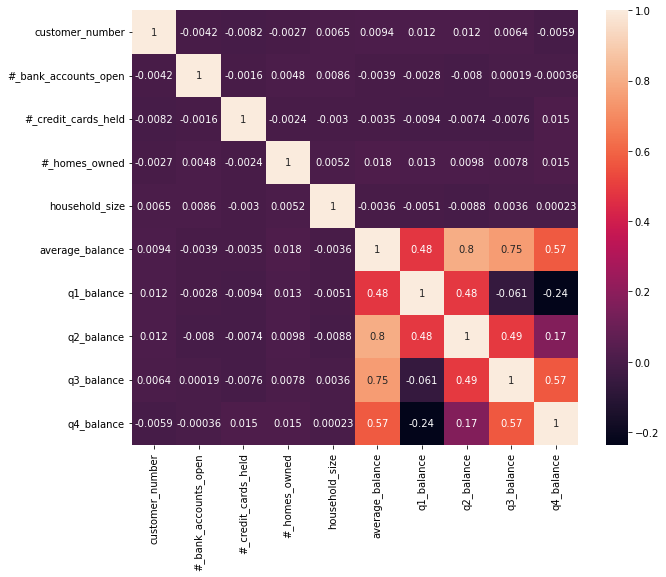

In [805]:
##checking the correlation of the numerical columns.
corr_matrix = data.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

In [806]:
#There is high correlation betwenn q2, q3 balance with average balance. 
#I decided to only keep the average_balance for the first try out: data_avg1
#I am also dropping customer_number, as it doesn't add any value to the model. 

data_avg1 = data.drop(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance', 'customer_number'], axis =1)

In [10]:
data_avg1

,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00
...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25


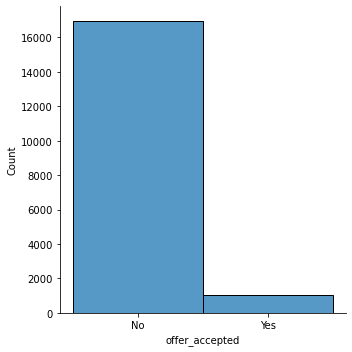

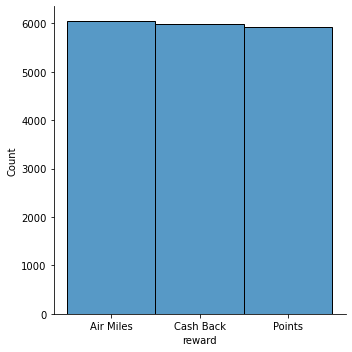

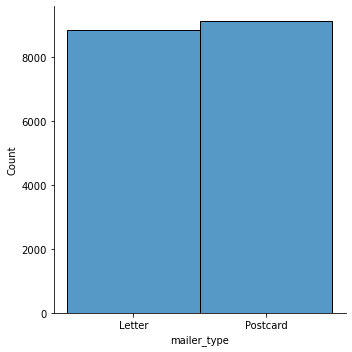

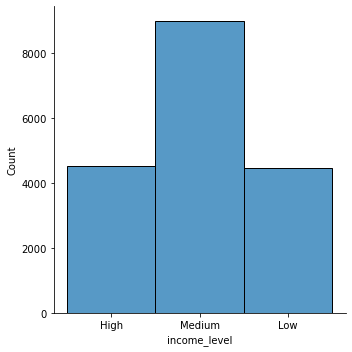

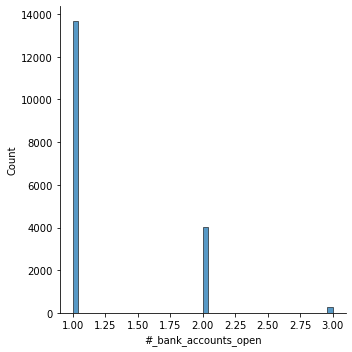

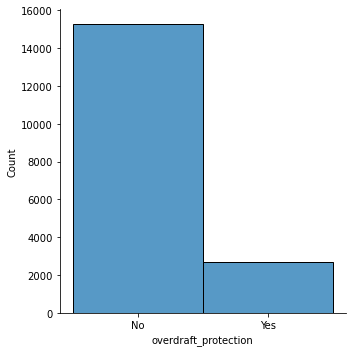

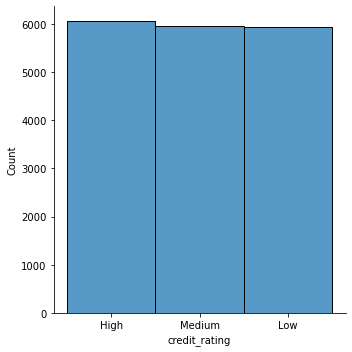

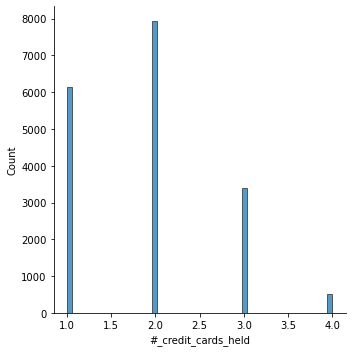

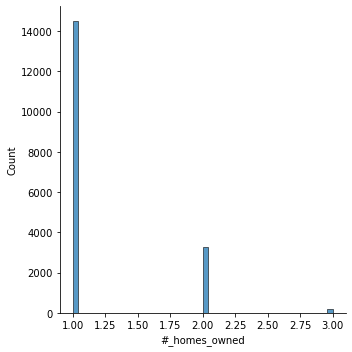

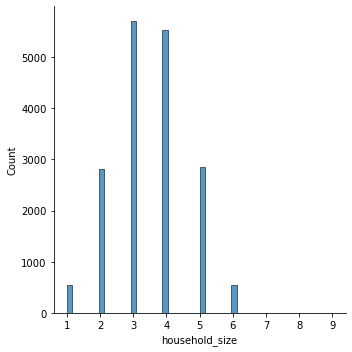

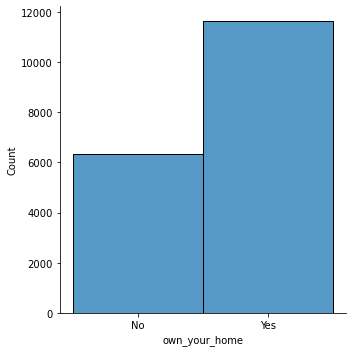

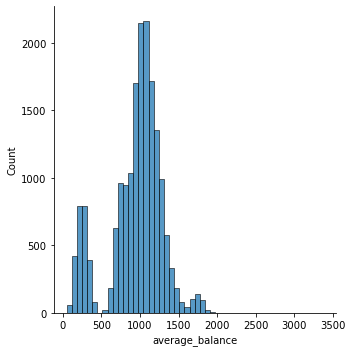

In [11]:
##Using histogram to see how the data distribute in all features

for col in data_avg1.columns:
    sns.displot(data = data_avg1[col], bins = 50)
plt.show()

##google how to normalize discrete numerical features. 
##own_your_home = under sample and oversample at the same time. 

<AxesSubplot:xlabel='average_balance'>

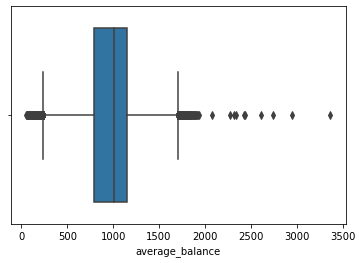

In [12]:
## Using boxplot to understand the distribution of the column 'average_balance'
sns.boxplot(x = data_avg1['average_balance'])    

In [13]:
##Taking a deep look of the categorical data

for col in data_avg1.columns:
    a = data_avg1[col].value_counts()
    print(a)

No     16955
Yes     1021
Name: offer_accepted, dtype: int64
Air Miles    6047
Cash Back    5995
Points       5934
Name: reward, dtype: int64
Postcard    9134
Letter      8842
Name: mailer_type, dtype: int64
Medium    9002
High      4519
Low       4455
Name: income_level, dtype: int64
1    13674
2     4007
3      295
Name: #_bank_accounts_open, dtype: int64
No     15300
Yes     2676
Name: overdraft_protection, dtype: int64
High      6064
Medium    5964
Low       5948
Name: credit_rating, dtype: int64
2    7933
1    6147
3    3381
4     515
Name: #_credit_cards_held, dtype: int64
1    14502
2     3289
3      185
Name: #_homes_owned, dtype: int64
3    5705
4    5532
5    2851
2    2809
1     539
6     538
8       1
9       1
Name: household_size, dtype: int64
Yes    11636
No      6340
Name: own_your_home, dtype: int64
1127.00    17
1070.00    16
1036.00    16
1078.50    16
1053.50    16
           ..
412.25      1
402.00      1
394.75      1
836.75      1
1427.25     1
Name: average_bala

In [14]:
##income_level, credit_rating convert to numerical features, as there is a level increasing in these features

data_avg1['income_level'].replace({"High":"3", "Medium" : "2", "Low" : "1"}, inplace=True)
data_avg1['credit_rating'].replace({"High":"3", "Medium" : "2", "Low" : "1"}, inplace=True)

In [15]:
data_avg1

,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance
0,No,Air Miles,Letter,3,1,No,3,2,1,4,No,1160.75
1,No,Air Miles,Letter,2,1,No,2,2,2,5,Yes,147.25
2,No,Air Miles,Postcard,3,2,No,2,2,1,2,Yes,276.50
3,No,Air Miles,Letter,2,2,No,3,1,1,4,No,1219.00
4,No,Air Miles,Letter,2,1,No,2,2,1,6,Yes,1211.00
...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,3,1,No,1,1,1,5,Yes,167.50
17996,No,Cash Back,Letter,3,1,No,1,3,1,3,Yes,850.50
17997,No,Cash Back,Letter,3,1,No,1,2,1,4,No,1087.25
17998,No,Cash Back,Letter,2,1,No,2,4,2,2,Yes,1022.25


### Modeling: Model M1 
#without any feature engineering, except encoding catagocial data
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]


In [19]:
##Encoding categorical data
data_avg_m1 = pd.get_dummies(data_avg1, columns = ['offer_accepted','reward', 'mailer_type', 'overdraft_protection', 'own_your_home'], drop_first = True)


In [20]:
##Converting data type
data_avg_m1['income_level'] = data_avg_m1['income_level'].astype('int')
data_avg_m1['credit_rating'] = data_avg_m1['credit_rating'].astype('int')

In [21]:
data_avg_m1

,income_level,#_bank_accounts_open,credit_rating,#_credit_cards_held,#_homes_owned,household_size,average_balance,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
0,3,1,3,2,1,4,1160.75,0,0,0,0,0,0
1,2,1,2,2,2,5,147.25,0,0,0,0,0,1
2,3,2,2,2,1,2,276.50,0,0,0,1,0,1
3,2,2,3,1,1,4,1219.00,0,0,0,0,0,0
4,2,1,2,2,1,6,1211.00,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,3,1,1,1,1,5,167.50,0,1,0,0,0,1
17996,3,1,1,3,1,3,850.50,0,1,0,0,0,1
17997,3,1,1,2,1,4,1087.25,0,1,0,0,0,0
17998,2,1,2,4,2,2,1022.25,0,1,0,0,0,1


In [22]:
##saving this file as a break point. In case, I mess up the dataset during the process, I could always come back to this point. 
data_avg_m1.to_csv('data_avg_m1.csv', index = False)

In [844]:
data_avg_m1=pd.read_csv('data_avg_m1.csv')

In [845]:
X = data_avg_m1.drop(['offer_accepted_Yes'], axis =1)
y = data_avg_m1['offer_accepted_Yes']


In [25]:
from sklearn.model_selection import train_test_split

In [846]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [847]:
##building a linear Regression model
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression().fit(X_train, y_train)

In [848]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

##check the predict data
Y_train_perditct = m1.predict(X_train)
Y_test_perditct = m1.predict(X_test)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


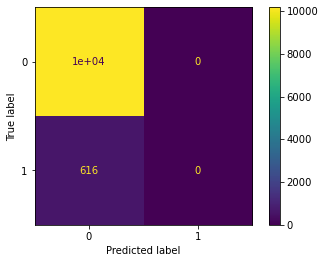

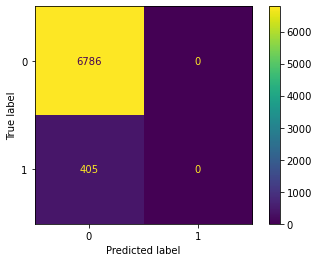

In [849]:
##to see the accurracy
plot_confusion_matrix(m1,X_train, y_train)
plot_confusion_matrix(m1,X_test, y_test)
##As you can see, this model is only able to predict "no". 

In [850]:
m1.score(X_test, y_test)

0.9436795994993742

In [851]:
print(classification_report(y_train, Y_train_perditct),classification_report(y_test, Y_test_perditct))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10169
           1       0.00      0.00      0.00       616

    accuracy                           0.94     10785
   macro avg       0.47      0.50      0.49     10785
weighted avg       0.89      0.94      0.92     10785
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      6786
           1       0.00      0.00      0.00       405

    accuracy                           0.94      7191
   macro avg       0.47      0.50      0.49      7191
weighted avg       0.89      0.94      0.92      7191



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/si

In [94]:
pd.DataFrame(zip(X_train.columns, np.transpose(m1.coef_.tolist()[0])), columns=['features', 'coef'])

,features,coef
0,income_level,-0.459722
1,#_bank_accounts_open,-0.001459
2,credit_rating,-0.952168
3,#_credit_cards_held,-0.087647
4,#_homes_owned,-0.116474
5,household_size,-0.079212
6,average_balance,-0.000080
7,reward_Cash Back,-0.589912
8,reward_Points,-0.105772
9,mailer_type_Postcard,1.008129


For the first model, as you can see with the data we have, the model only returns "0" to the target value. Even the score is good, we can use the model. We need to deal with the balance data. 

What's more, you can see some important factors here: 
* income level
* creadit rating
* reward_cash 
* mail type


[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]

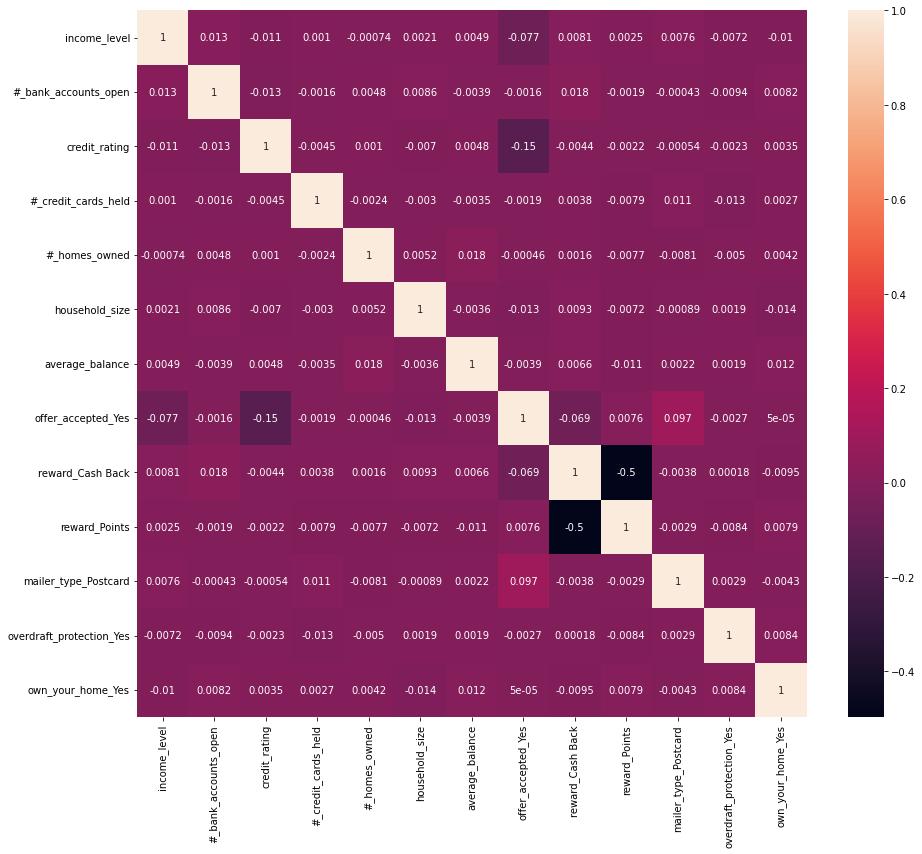

In [171]:
corr_matrix = data_avg_m1.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (15, 13))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

### Modeling: Model M2 
#cleaning the outliers in Average income
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]


In [852]:
##In this model, what I will do is: Clean out the outliers in average_balance, and scale it

data_avg_m2 = pd.read_csv('data_avg_m1.csv')

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='average_balance'>

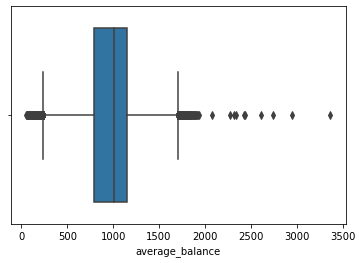

In [853]:
#Let's take a look of the column "average_balance" to see if it's normally distrubuted
sns.boxplot(data_avg_m2['average_balance'])

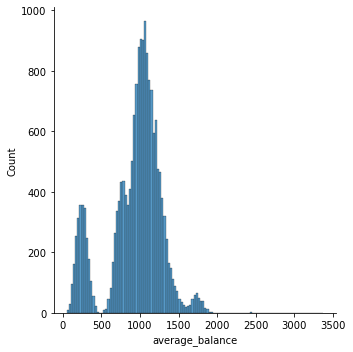

In [854]:
sns.displot(data_avg_m2['average_balance'])

As you can see for this feature "average_balance", the whole data doesn't display as normal distrubution. In this case, we will need to clean out the outliars. As you can see there is a clean break in 500 and aroung 1600. 

In [855]:
##However, I will try to use the percentile method to clean out the outliars first. 
iqr = np.percentile(data_avg_m2['average_balance'], 75)- np.percentile(data_avg_m2['average_balance'], 25)
upper_limit = np.percentile(data_avg_m2['average_balance'], 75) + 1.5*iqr
lower_limit = np.percentile(data_avg_m2['average_balance'], 75) - 1.5*iqr
data_avg_m2['average_balance'] = data_avg_m2[(data_avg_m2['average_balance']>lower_limit) & (data_avg_m2['average_balance']<upper_limit)]['average_balance']

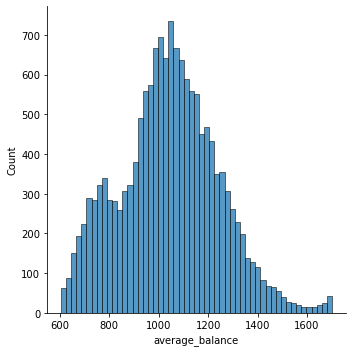

In [856]:
sns.displot(data_avg_m2['average_balance'])

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='average_balance'>

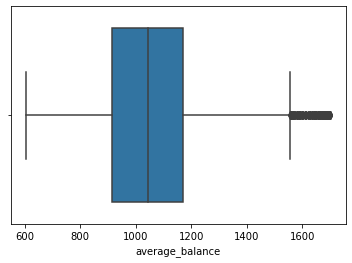

In [857]:
sns.boxplot(data_avg_m2['average_balance'])

In [858]:
data_avg_m2.isna().sum()

income_level                   0
#_bank_accounts_open           0
credit_rating                  0
#_credit_cards_held            0
#_homes_owned                  0
household_size                 0
average_balance             2871
offer_accepted_Yes             0
reward_Cash Back               0
reward_Points                  0
mailer_type_Postcard           0
overdraft_protection_Yes       0
own_your_home_Yes              0
dtype: int64

In [859]:
data_avg_m2 = data_avg_m2[~(data_avg_m2['average_balance'].isna())]

In [860]:
data_num = data_avg_m2.drop(['offer_accepted_Yes'], axis = 1)

In [270]:
data_num

,income_level,#_bank_accounts_open,credit_rating,#_credit_cards_held,#_homes_owned,household_size,average_balance,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
0,3,1,3,2,1,4,1160.75,0,0,0,0,0
3,2,2,3,1,1,4,1219.00,0,0,0,0,0
4,2,1,2,2,1,6,1211.00,0,0,0,0,1
5,2,1,3,3,1,4,1114.75,0,0,0,0,0
8,2,1,1,2,1,4,1005.00,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17970,2,1,1,2,1,2,985.25,0,0,1,0,1
17972,3,1,1,3,1,3,850.50,1,0,0,0,1
17973,3,1,1,2,1,4,1087.25,1,0,0,0,0
17974,2,1,2,4,2,2,1022.25,1,0,0,0,1


In [861]:
y = data_avg_m2['offer_accepted_Yes']
X = data_num

In [862]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [863]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_train)
X_train_standard = transformer.transform(X_train)

In [864]:
X_train_standard 

array([[-1.41638929, -0.54470262, -1.22990739, ..., -1.01725129,
        -0.42833196, -1.34999452],
       [ 1.39775871, -0.54470262, -0.00755289, ...,  0.98304127,
        -0.42833196,  0.74074375],
       [ 1.39775871, -0.54470262,  1.2148016 , ...,  0.98304127,
        -0.42833196, -1.34999452],
       ...,
       [-0.00931529, -0.54470262, -1.22990739, ..., -1.01725129,
        -0.42833196, -1.34999452],
       [-0.00931529, -0.54470262,  1.2148016 , ..., -1.01725129,
        -0.42833196,  0.74074375],
       [-0.00931529, -0.54470262, -1.22990739, ...,  0.98304127,
        -0.42833196, -1.34999452]])

In [865]:
##Classification model: 
m2 = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_standard, y_train)

In [866]:
m2.score(X_test, y_test)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.943230718305197

In [867]:
##check the predict data
Y_train_perditct = m2.predict(X_train)
Y_test_perditct = m2.predict(X_test)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/ba

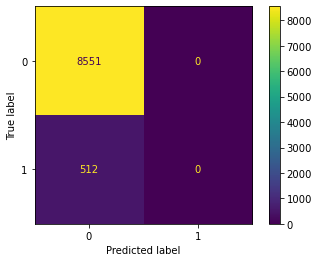

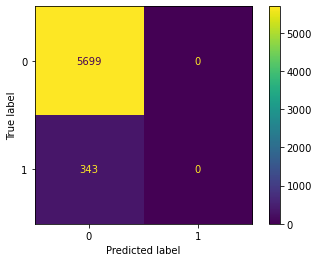

In [868]:
##to see the accurracy
plot_confusion_matrix(m2,X_train, y_train)
plot_confusion_matrix(m2,X_test, y_test)

##the performance is slightly better, however the model still only predicts "NO".

In [869]:
print(classification_report(y_train, Y_train_perditct),classification_report(y_test, Y_test_perditct))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8551
           1       0.00      0.00      0.00       512

    accuracy                           0.94      9063
   macro avg       0.47      0.50      0.49      9063
weighted avg       0.89      0.94      0.92      9063
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      5699
           1       0.00      0.00      0.00       343

    accuracy                           0.94      6042
   macro avg       0.47      0.50      0.49      6042
weighted avg       0.89      0.94      0.92      6042



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/si

In this model, we are just going to explode a bit numerial featuring. As you can see, after cleaning the outliars and scaling the feature, the performance of the model has increase, although m2 still only perdict zero. 


### Modeling: Model M3 
#deal with the inbalance data.
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]


In [109]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [879]:
data_avg_m3=pd.read_csv('data_avg_m1.csv')

In [880]:
data_avg_m3

,income_level,#_bank_accounts_open,credit_rating,#_credit_cards_held,#_homes_owned,household_size,average_balance,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,overdraft_protection_Yes,own_your_home_Yes
0,3,1,3,2,1,4,1160.75,0,0,0,0,0,0
1,2,1,2,2,2,5,147.25,0,0,0,0,0,1
2,3,2,2,2,1,2,276.50,0,0,0,1,0,1
3,2,2,3,1,1,4,1219.00,0,0,0,0,0,0
4,2,1,2,2,1,6,1211.00,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,3,1,1,1,1,5,167.50,0,1,0,0,0,1
17972,3,1,1,3,1,3,850.50,0,1,0,0,0,1
17973,3,1,1,2,1,4,1087.25,0,1,0,0,0,0
17974,2,1,2,4,2,2,1022.25,0,1,0,0,0,1


In [881]:
X = data_avg_m3.drop(['offer_accepted_Yes'], axis =1)
y = data_avg_m3['offer_accepted_Yes']


In [882]:
##Split the train and test data before dealing with the inbalabce data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [883]:
#under sampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=10)
X_rus, Y_rus = rus.fit_resample(X_train,y_train)
Y_rus.value_counts()

0    616
1    616
Name: offer_accepted_Yes, dtype: int64

In [884]:
classification_random_under = LogisticRegression(random_state=0, solver='lbfgs').fit(X_rus, Y_rus)


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/ba

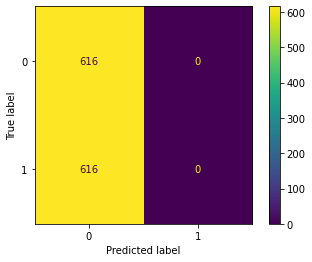

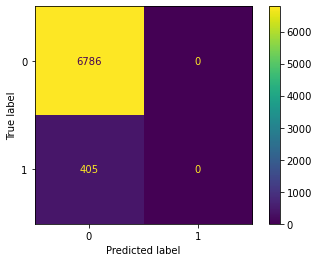

In [885]:
##to see the accurracy
plot_confusion_matrix(classification,X_rus, Y_rus)
plot_confusion_matrix(classification,X_test, y_test)

In [889]:
Y_train_perditct = classification_random_under.predict(X_rus)
Y_test_perditct = classification_random_under.predict(X_test)

In [890]:
classification_random_under.score(X_test, y_test)

0.6663885412320957

In [891]:
print(classification_report(Y_rus, Y_train_perditct),classification_report(y_test, Y_test_perditct))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       616
           1       0.70      0.71      0.71       616

    accuracy                           0.70      1232
   macro avg       0.70      0.70      0.70      1232
weighted avg       0.70      0.70      0.70      1232
               precision    recall  f1-score   support

           0       0.97      0.66      0.79      6786
           1       0.11      0.70      0.19       405

    accuracy                           0.67      7191
   macro avg       0.54      0.68      0.49      7191
weighted avg       0.93      0.67      0.76      7191



In [366]:
#under sampling using TomekLinks
t1 = TomekLinks()
X_under,Y_under = t1.fit_resample(X_train,y_train)
Y_under.value_counts()

0    9904
1     616
Name: offer_accepted_Yes, dtype: int64

In [367]:
classification_tomeklinks = LogisticRegression(random_state=0, solver='lbfgs').fit(X_under,Y_under)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [368]:
classification_tomeklinks.score(X_test, y_test)

0.9436795994993742

In [ ]:
print(classification_report(Y_res, Y_train_perditct),classification_report(y_test, Y_test_perditct))

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/ba

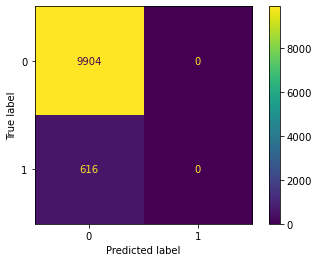

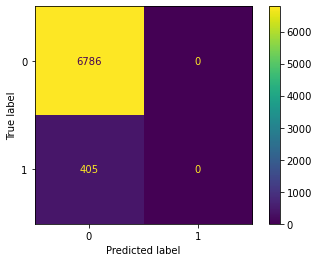

In [370]:
##to see the accurracy
plot_confusion_matrix(classification,X_under, Y_under)
plot_confusion_matrix(classification,X_test, y_test)

After applying under sampling, performance is slightly better, however the model still only predicts "NO".

In [371]:
##Over Sampling
#over sampling using RandomoverSampler
ros = RandomOverSampler(random_state=10)
X_rus, Y_rus = ros.fit_resample(X_train,y_train)
Y_rus.value_counts()

0    10169
1    10169
Name: offer_accepted_Yes, dtype: int64

In [374]:
classification_random_over = LogisticRegression(random_state=0, solver='lbfgs').fit(X_rus, Y_rus)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


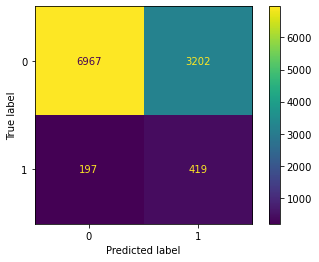

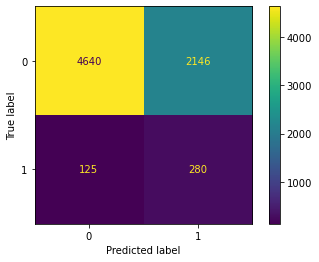

In [375]:
##to see the accurracy
plot_confusion_matrix(classification_random_over ,X_train, y_train)
plot_confusion_matrix(classification_random_over ,X_test, y_test)

##the performance is slightly better, however the model still only predicts "NO".

In [376]:
classification_random_over.score(X_test, y_test)

0.6841885690446391

In [377]:
##Over Sampling
#over sampling using SMOTE
sm = SMOTE(random_state = 42)
X_res, Y_res = sm.fit_resample(X_train,y_train)
Y_res.value_counts()

0    10169
1    10169
Name: offer_accepted_Yes, dtype: int64

In [378]:
classification_smote = LogisticRegression(random_state=0, solver='lbfgs').fit(X_res, Y_res)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [379]:
classification_smote.score(X_test, y_test)

0.7936309275483243

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


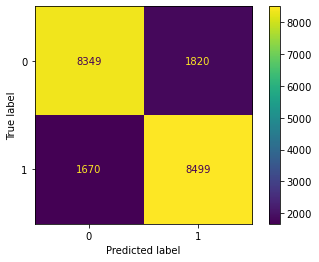

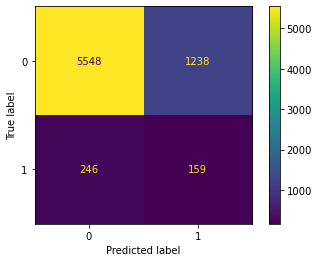

In [380]:
##to see the accurracy
plot_confusion_matrix(classification_smote,X_res, Y_res)
plot_confusion_matrix(classification_smote,X_test, y_test)

In [ ]:
Y_train_perditct = classification_smote.predict(X_rus)
Y_test_perditct = classification_smote.predict(X_test)

In [381]:
pd.DataFrame(zip(X_res.columns, np.transpose(classification_smote.coef_.tolist()[0])), columns=['features', 'coef'])

,features,coef
0,income_level,-0.806725
1,#_bank_accounts_open,-0.397877
2,credit_rating,-1.382343
3,#_credit_cards_held,-0.139592
4,#_homes_owned,-0.151236
5,household_size,-0.037276
6,average_balance,0.000647
7,reward_Cash Back,-3.781316
8,reward_Points,-1.832542
9,mailer_type_Postcard,-0.150016


As you can see, the dataset reacts much better than over sampling than under sampling, as the proportion of "No" is much higher. In this case, I decided to go with over sampling using SMOTE to deal with inblance data. 

### Modeling: Model M3_1 
#deal with the inbalance data.
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]

In [945]:
data_avg_m3_1=pd.read_csv('data_avg_m1.csv')

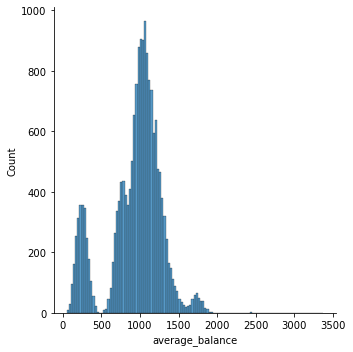

In [946]:
sns.displot(data_avg_m3_1['average_balance'])

In [947]:
##However, I will try to use the percentile method to clean out the outliars first. 
data_avg_m3_1['average_balance'] = data_avg_m3_1[(data_avg_m3_1['average_balance']>500) & (data_avg_m3_1['average_balance']<1600)]['average_balance']

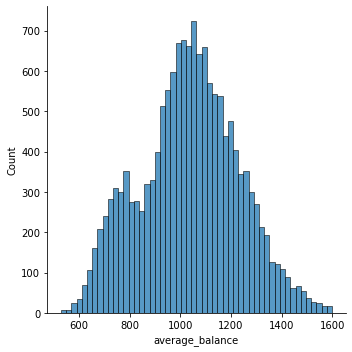

In [948]:
sns.displot(data_avg_m3_1['average_balance'])

In [949]:
data_avg_m3_1.isna().sum()


income_level                   0
#_bank_accounts_open           0
credit_rating                  0
#_credit_cards_held            0
#_homes_owned                  0
household_size                 0
average_balance             2927
offer_accepted_Yes             0
reward_Cash Back               0
reward_Points                  0
mailer_type_Postcard           0
overdraft_protection_Yes       0
own_your_home_Yes              0
dtype: int64

In [950]:
data_avg_m3_1 = data_avg_m3_1[~(data_avg_m3_1['average_balance'].isna())]


In [951]:
X = data_avg_m3_1.drop(['offer_accepted_Yes'], axis = 1)
y = data_avg_m3_1['offer_accepted_Yes']

In [952]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [953]:
numericals_train= X_train[['income_level','#_bank_accounts_open','credit_rating','#_credit_cards_held','#_homes_owned','household_size','average_balance']]
numericals_test= X_test[['income_level','#_bank_accounts_open','credit_rating','#_credit_cards_held','#_homes_owned','household_size','average_balance']]
cat_train = X_train[['reward_Cash Back','reward_Points','mailer_type_Postcard','overdraft_protection_Yes','own_your_home_Yes']]
cat_test = X_test[['reward_Cash Back','reward_Points','mailer_type_Postcard','overdraft_protection_Yes','own_your_home_Yes']]

In [954]:
transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = pd.DataFrame(transformer.transform(numericals_train))
numericals_test_standardized = pd.DataFrame(transformer.transform(numericals_test))

In [955]:
X_train_standard = np.concatenate([cat_train, numericals_train_standardized], axis=1)
X_test_standard = np.concatenate([cat_test, numericals_test_standardized], axis=1)

In [956]:
sm = SMOTE(random_state = 42)
X_res, Y_res = sm.fit_resample(X_train_standard, y_train)
Y_res.value_counts()

0    8521
1    8521
Name: offer_accepted_Yes, dtype: int64

In [957]:
m3 = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_res, Y_res)

In [958]:
m3.score(X_test_standard, y_test)

0.6960132890365448

In [959]:
Y_train_perditct = m3.predict(X_res)
Y_test_perditct = m3.predict(X_test_standard)

In [960]:
print(classification_report(Y_res, Y_train_perditct),classification_report(y_test, Y_test_perditct))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      8521
           1       0.72      0.76      0.74      8521

    accuracy                           0.74     17042
   macro avg       0.74      0.74      0.74     17042
weighted avg       0.74      0.74      0.74     17042
               precision    recall  f1-score   support

           0       0.97      0.70      0.81      5674
           1       0.11      0.64      0.19       346

    accuracy                           0.70      6020
   macro avg       0.54      0.67      0.50      6020
weighted avg       0.92      0.70      0.78      6020



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


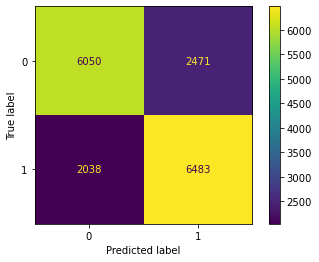

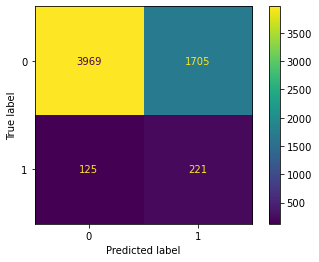

In [906]:
plot_confusion_matrix(m3,X_res, Y_res)
plot_confusion_matrix(m3,X_test_standard, y_test)

In [709]:
pd.DataFrame(zip(X_train.columns, np.transpose(m3.coef_.tolist()[0])), columns=['features', 'coef'])

,features,coef
0,income_level,-0.635868
1,#_bank_accounts_open,-0.286355
2,credit_rating,0.724695
3,#_credit_cards_held,-0.058078
4,#_homes_owned,0.053293
5,household_size,-0.198624
6,average_balance,-0.037979
7,reward_Cash Back,-0.488377
8,reward_Points,-0.029235
9,mailer_type_Postcard,0.007080


In [ ]:
Y_train_perditct = m3_2.predict(X_rus)
Y_test_perditct = m3_2.predict(X_test_standard)

In [907]:
##usiing randomoversampler:
ros = RandomOverSampler(random_state=10)
X_rus, Y_rus = ros.fit_resample(X_train_standard,y_train)
Y_rus.value_counts()

0    8521
1    8521
Name: offer_accepted_Yes, dtype: int64

In [908]:
m3_2 = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_rus, Y_rus)

In [909]:
m3_2.score(X_test_standard, y_test)

0.6710963455149501

In [911]:
Y_train_perditct = m3_2.predict(X_rus)
Y_test_perditct = m3_2.predict(X_test_standard)

In [912]:
print(classification_report(Y_rus, Y_train_perditct),classification_report(y_test, Y_test_perditct))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      8521
           1       0.70      0.73      0.71      8521

    accuracy                           0.71     17042
   macro avg       0.71      0.71      0.71     17042
weighted avg       0.71      0.71      0.71     17042
               precision    recall  f1-score   support

           0       0.97      0.67      0.79      5674
           1       0.11      0.66      0.19       346

    accuracy                           0.67      6020
   macro avg       0.54      0.67      0.49      6020
weighted avg       0.92      0.67      0.76      6020



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


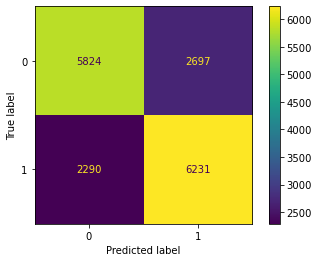

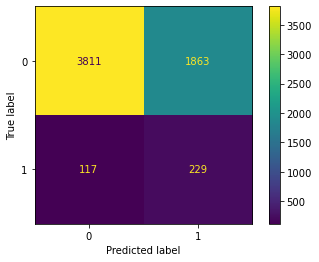

In [910]:
plot_confusion_matrix(m3_2,X_rus, Y_rus)
plot_confusion_matrix(m3_2,X_test_standard, y_test)

### Modeling: Model M4 
#only take those features which are significant
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]


In [1093]:
data_avg_m4=pd.read_csv('data_avg_m1.csv')

In [1094]:
data_avg_m4['average_balance'] = data_avg_m4[(data_avg_m4['average_balance']>500) & (data_avg_m4['average_balance']<1600)]['average_balance']

In [1095]:
data_avg_m4.isna().sum()

income_level                   0
#_bank_accounts_open           0
credit_rating                  0
#_credit_cards_held            0
#_homes_owned                  0
household_size                 0
average_balance             2927
offer_accepted_Yes             0
reward_Cash Back               0
reward_Points                  0
mailer_type_Postcard           0
overdraft_protection_Yes       0
own_your_home_Yes              0
dtype: int64

In [1096]:
data_avg_m4 = data_avg_m4[~(data_avg_m4['average_balance'].isna())]


In [1098]:
##only take those features which are significant
X = data_avg_m4[['income_level','#_bank_accounts_open','credit_rating','household_size','reward_Cash Back','mailer_type_Postcard']]
y = data_avg_m4['offer_accepted_Yes']

In [1099]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [1100]:
numericals_train= X_train[['income_level','#_bank_accounts_open','credit_rating','household_size']]
numericals_test= X_test[['income_level','#_bank_accounts_open','credit_rating','household_size']]
cat_train = X_train[['reward_Cash Back','mailer_type_Postcard']]
cat_test = X_test[['reward_Cash Back','mailer_type_Postcard']]

In [1101]:
transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = pd.DataFrame(transformer.transform(numericals_train))
numericals_test_standardized = pd.DataFrame(transformer.transform(numericals_test))

In [1102]:
X_train_standard = np.concatenate([cat_train, numericals_train_standardized], axis=1)
X_test_standard = np.concatenate([cat_test, numericals_test_standardized], axis=1)

In [1103]:
sm = SMOTE(random_state = 42)
X_res, Y_res = sm.fit_resample(X_train_standard, y_train)
Y_res.value_counts()

0    8521
1    8521
Name: offer_accepted_Yes, dtype: int64

In [1104]:
m4 = LogisticRegression(random_state=0, solver='lbfgs').fit(X_res, Y_res)

In [1105]:
Y_train_perditct = m4.predict(X_res)
Y_test_perditct = m4.predict(X_test_standard)

In [1106]:
print(classification_report(Y_res, Y_train_perditct),classification_report(y_test, Y_test_perditct))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71      8521
           1       0.70      0.73      0.72      8521

    accuracy                           0.71     17042
   macro avg       0.71      0.71      0.71     17042
weighted avg       0.71      0.71      0.71     17042
               precision    recall  f1-score   support

           0       0.97      0.68      0.80      5674
           1       0.11      0.65      0.19       346

    accuracy                           0.68      6020
   macro avg       0.54      0.67      0.50      6020
weighted avg       0.92      0.68      0.77      6020



In [1107]:
m4.score(X_test_standard , y_test)

0.6817275747508306

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


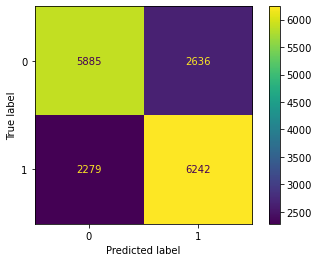

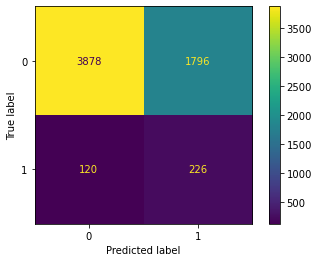

In [1108]:

plot_confusion_matrix(m4 ,X_res, Y_res)
plot_confusion_matrix(m4 ,X_test_standard, y_test)

##the performance is slightly better, however the model still only predicts "NO".

In [728]:
pd.DataFrame(zip(X_train.columns, np.transpose(m3.coef_.tolist()[0])), columns=['features', 'coef'])

,features,coef
0,income_level,-0.635868
1,#_bank_accounts_open,-0.286355
2,credit_rating,0.724695
3,household_size,-0.058078
4,reward_Cash Back,0.053293


### Modeling: Model M5
#only take those features which are significant for my understanding
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]

In [1001]:
data_avg_m5=pd.read_csv('data_avg_m1.csv')

In [1002]:
data_avg_m5['average_balance'] = data_avg_m5[(data_avg_m5['average_balance']>500) & (data_avg_m5['average_balance']<1600)]['average_balance']

In [1003]:
data_avg_m5 = data_avg_m5[~(data_avg_m5['average_balance'].isna())]


In [1004]:
data_avg_m5.columns

Index(['income_level', '#_bank_accounts_open', 'credit_rating',
       '#_credit_cards_held', '#_homes_owned', 'household_size',
       'average_balance', 'offer_accepted_Yes', 'reward_Cash Back',
       'reward_Points', 'mailer_type_Postcard', 'overdraft_protection_Yes',
       'own_your_home_Yes'],
      dtype='object')

In [1005]:
##only take those features which are significant
X = data_avg_m5[['income_level','#_bank_accounts_open','credit_rating','#_homes_owned','household_size','reward_Cash Back','reward_Points','mailer_type_Postcard']]
y = data_avg_m5['offer_accepted_Yes']

In [1006]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [1007]:
numericals_train= X_train[['income_level','#_bank_accounts_open','credit_rating','#_homes_owned','household_size']]
numericals_test= X_test[['income_level','#_bank_accounts_open','credit_rating','#_homes_owned','household_size']]
cat_train = X_train[['reward_Cash Back','reward_Points','mailer_type_Postcard']]
cat_test = X_test[['reward_Cash Back','reward_Points','mailer_type_Postcard']]

In [1008]:
transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = pd.DataFrame(transformer.transform(numericals_train))
numericals_test_standardized = pd.DataFrame(transformer.transform(numericals_test))

In [1009]:
X_train_standard = np.concatenate([cat_train, numericals_train_standardized], axis=1)
X_test_standard = np.concatenate([cat_test, numericals_test_standardized], axis=1)

In [1010]:
sm = SMOTE(random_state = 42)
X_res, Y_res = sm.fit_resample(X_train_standard, y_train)
Y_res.value_counts()

0    8521
1    8521
Name: offer_accepted_Yes, dtype: int64

In [1011]:
m5 = LogisticRegression(random_state=0, solver='lbfgs').fit(X_res, Y_res)

In [1012]:
m5.score(X_test_standard, y_test)
#if I don't scale the test sample, it's more accurate than scaling it. 

0.6908637873754153

In [1014]:
Y_train_perditct = m5.predict(X_res)
Y_test_perditct = m5.predict(X_test_standard)

In [1015]:

print(classification_report(Y_res, Y_train_perditct),classification_report(y_test, Y_test_perditct))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      8521
           1       0.72      0.76      0.74      8521

    accuracy                           0.73     17042
   macro avg       0.73      0.73      0.73     17042
weighted avg       0.73      0.73      0.73     17042
               precision    recall  f1-score   support

           0       0.97      0.69      0.81      5674
           1       0.11      0.64      0.19       346

    accuracy                           0.69      6020
   macro avg       0.54      0.67      0.50      6020
weighted avg       0.92      0.69      0.77      6020



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


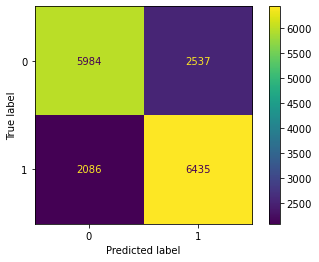

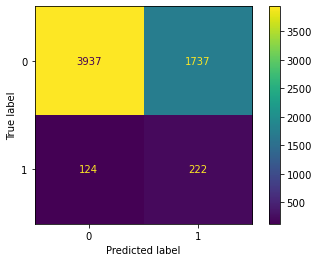

In [1013]:
plot_confusion_matrix(m5 ,X_res, Y_res)
plot_confusion_matrix(m5 ,X_test_standard, y_test)

In [925]:
pd.DataFrame(zip(X_train.columns, np.transpose(m5.coef_.tolist()[0])), columns=['features', 'coef'])

,features,coef
0,income_level,-1.218828
1,#_bank_accounts_open,-0.545751
2,credit_rating,1.382404
3,#_homes_owned,-0.401533
4,household_size,-0.072609
5,reward_Cash Back,-0.963573
6,reward_Points,0.013584
7,mailer_type_Postcard,-0.036347


### Modeling: Model M6
#only take those features which are significant for my understanding
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]

In [1049]:
data_avg_m6=pd.read_csv('data_avg_m1.csv')

In [1050]:
##only take those features which are significant
X = data_avg_m6[['income_level','#_bank_accounts_open','credit_rating','#_homes_owned','household_size','reward_Cash Back','reward_Points','mailer_type_Postcard']]
y = data_avg_m6['offer_accepted_Yes']

In [1051]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [1052]:
numericals_train= X_train[['income_level','#_bank_accounts_open','credit_rating','#_homes_owned','household_size']]
numericals_test= X_test[['income_level','#_bank_accounts_open','credit_rating','#_homes_owned','household_size']]
cat_train = X_train[['reward_Cash Back','reward_Points','mailer_type_Postcard']]
cat_test = X_test[['reward_Cash Back','reward_Points','mailer_type_Postcard']]

In [1053]:
transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = pd.DataFrame(transformer.transform(numericals_train))
numericals_test_standardized = pd.DataFrame(transformer.transform(numericals_test))

In [1054]:

X_train_standard = np.concatenate([cat_train, numericals_train_standardized], axis=1)
X_test_standard = np.concatenate([cat_test, numericals_test_standardized], axis=1)

In [1055]:
sm = SMOTE(random_state = 42)
X_res, Y_res = sm.fit_resample(X_train, y_train)
Y_res.value_counts()

0    10169
1    10169
Name: offer_accepted_Yes, dtype: int64

In [1056]:
m6 = LogisticRegression(random_state=0, solver='lbfgs').fit(X_res, Y_res)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


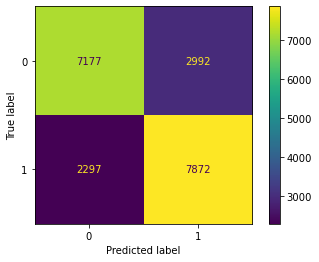

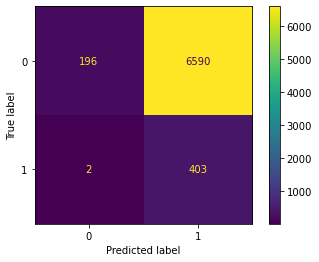

In [1057]:
plot_confusion_matrix(m6 ,X_res, Y_res)
plot_confusion_matrix(m6 ,X_test_standard, y_test)

In [1058]:
m6.score(X_test_standard, y_test)
#if I don't scale the test sample, it's more accurate than scaling it. 

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.08329856765401196

### Modeling: Model M7
#encoding the categorical features "income_level", "credit_rating" 
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]

In [1039]:
data_avg2 = data.drop(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance', 'customer_number'], axis =1)

In [1040]:
data_avg2

,offer_accepted,reward,mailer_type,income_level,#_bank_accounts_open,overdraft_protection,credit_rating,#_credit_cards_held,#_homes_owned,household_size,own_your_home,average_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00
...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25


In [1041]:
##Encoding categorical data
data_avg2 = pd.get_dummies(data_avg2, columns = ['offer_accepted','reward', 'mailer_type', 'overdraft_protection', 'own_your_home','income_level','credit_rating'], drop_first = True)


In [1042]:
X = data_avg2.drop(['offer_accepted_Yes'], axis =1)
y = data_avg2['offer_accepted_Yes']


In [1043]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [1044]:
sm = SMOTE(random_state = 42)
X_res, Y_res = sm.fit_resample(X_train, y_train)
Y_res.value_counts()

0    10169
1    10169
Name: offer_accepted_Yes, dtype: int64

In [1045]:
m7 = LogisticRegression(random_state=0, solver='lbfgs').fit(X_res, Y_res)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


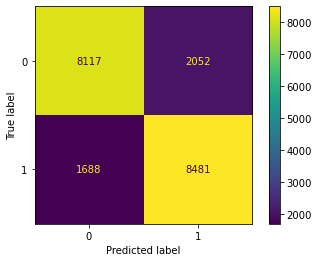

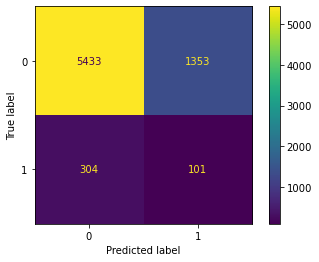

In [1046]:
plot_confusion_matrix(m7 ,X_res, Y_res)
plot_confusion_matrix(m7 ,X_test, y_test)

In [1048]:
Y_train_perditct = m7.predict(X_res)
Y_test_perditct = m7.predict(X_test)
print(classification_report(Y_res, Y_train_perditct),classification_report(y_test, Y_test_perditct))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81     10169
           1       0.81      0.83      0.82     10169

    accuracy                           0.82     20338
   macro avg       0.82      0.82      0.82     20338
weighted avg       0.82      0.82      0.82     20338
               precision    recall  f1-score   support

           0       0.95      0.80      0.87      6786
           1       0.07      0.25      0.11       405

    accuracy                           0.77      7191
   macro avg       0.51      0.53      0.49      7191
weighted avg       0.90      0.77      0.82      7191



In [ ]:
Model 8

In [1081]:
data_avg2_m8 = data.drop(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance', 'customer_number'], axis =1)

In [1082]:
data_avg2_m8['average_balance'] = data_avg2_m8[(data_avg2_m8['average_balance']>500) & (data_avg2_m8['average_balance']<1600)]['average_balance']

In [1083]:
data_avg2_m8 = data_avg2_m8[~(data_avg2_m8['average_balance'].isna())]


In [1084]:
##Encoding categorical data
data_avg2_m8 = pd.get_dummies(data_avg2_m8, columns = ['offer_accepted','reward', 'mailer_type', 'overdraft_protection', 'own_your_home','income_level','credit_rating'], drop_first = True)


In [1085]:
X = data_avg2_m8.drop(['offer_accepted_Yes'], axis =1)
y = data_avg2_m8['offer_accepted_Yes']


In [1086]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [1087]:
numericals_train= X_train[['#_bank_accounts_open','#_homes_owned','household_size','average_balance']]
numericals_test= X_test[['#_bank_accounts_open','#_homes_owned','household_size','average_balance']]
cat_train = X_train.drop(['#_bank_accounts_open','#_homes_owned','household_size','average_balance'], axis =1)
cat_test = X_test.drop(['#_bank_accounts_open','#_homes_owned','household_size','average_balance'], axis =1)

In [1088]:
transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = pd.DataFrame(transformer.transform(numericals_train))
numericals_test_standardized = pd.DataFrame(transformer.transform(numericals_test))
X_train_standard = np.concatenate([cat_train, numericals_train_standardized], axis=1)
X_test_standard = np.concatenate([cat_test, numericals_test_standardized], axis=1)

In [1089]:
sm = SMOTE(random_state = 42)
X_res, Y_res = sm.fit_resample(X_train, y_train)
Y_res.value_counts()

0    8521
1    8521
Name: offer_accepted_Yes, dtype: int64

In [1090]:
m8 = LogisticRegression(random_state=0, solver='lbfgs').fit(X_res, Y_res)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


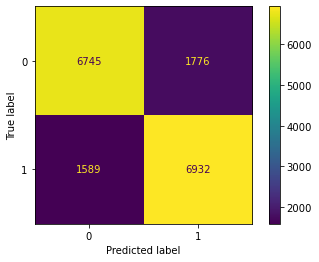

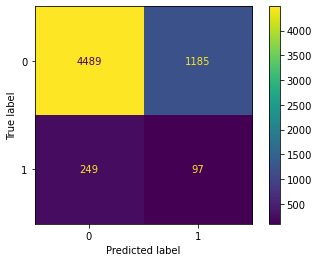

In [1091]:
plot_confusion_matrix(m8 ,X_res, Y_res)
plot_confusion_matrix(m8 ,X_test, y_test)

In [1092]:
Y_train_perditct = m8.predict(X_res)
Y_test_perditct = m8.predict(X_test)
print(classification_report(Y_res, Y_train_perditct),classification_report(y_test, Y_test_perditct))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      8521
           1       0.80      0.81      0.80      8521

    accuracy                           0.80     17042
   macro avg       0.80      0.80      0.80     17042
weighted avg       0.80      0.80      0.80     17042
               precision    recall  f1-score   support

           0       0.95      0.79      0.86      5674
           1       0.08      0.28      0.12       346

    accuracy                           0.76      6020
   macro avg       0.51      0.54      0.49      6020
weighted avg       0.90      0.76      0.82      6020



In [1034]:
rus = RandomOverSampler(random_state=10)
X_rus, Y_rus = rus.fit_resample(X_train,y_train)
Y_rus.value_counts()

0    10169
1    10169
Name: offer_accepted_Yes, dtype: int64

In [1035]:
m7_1 = LogisticRegression(random_state=0, solver='lbfgs').fit(X_rus, Y_rus)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


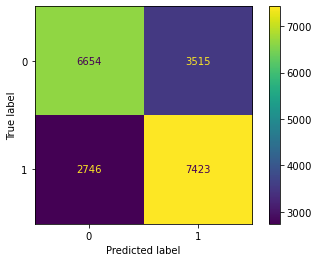

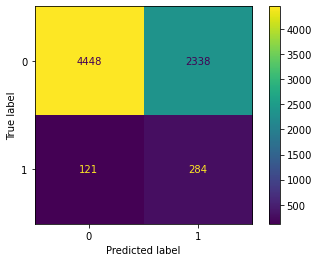

In [1036]:
plot_confusion_matrix(m7_1 ,X_rus, Y_rus)
plot_confusion_matrix(m7_1 ,X_test, y_test)

In [1037]:
m7.score(X_test, y_test)

0.7695730774579336

In [816]:
pd.DataFrame(zip(X_train.columns, np.transpose(m7.coef_.tolist()[0])), columns=['features', 'coef'])

,features,coef
0,#_bank_accounts_open,-0.721469
1,#_credit_cards_held,-0.453416
2,#_homes_owned,-0.736177
3,household_size,-0.196203
4,average_balance,0.000333
5,reward_Cash Back,-3.353333
6,reward_Points,-1.516726
7,mailer_type_Postcard,-0.191023
8,overdraft_protection_Yes,-1.688686
9,own_your_home_Yes,-0.837629


### Modeling: Other models
#try other types of models here
[<a href="#Credit-Card-Marketing-Project">Back to Top</a>]

In [750]:

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
scores = []
for k in range(2,30):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_res, Y_res)
    scores.append(model.score(X_test, y_test))

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KN

Text(0, 0.5, 'Accuracy')

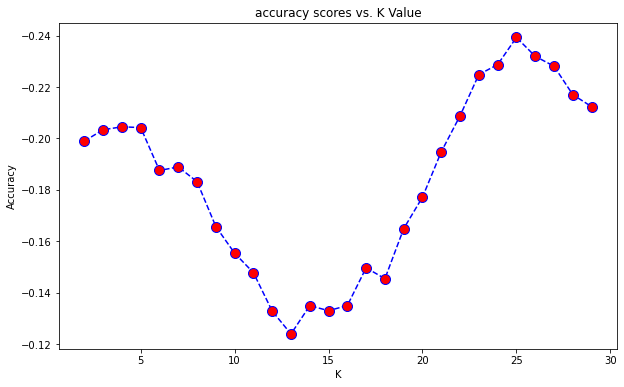

In [752]:
plt.figure(figsize=(10,6))
plt.plot(range(2,30),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('Accuracy')